# Face Detection Using MTCNN

In [1]:
!pip install git+https://github.com/rcmalli/keras-vggface.git

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-62c2yf1p
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-62c2yf1p
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py) ... done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8298 sha256=85576b592e15256dfa4c463ad5f688b53fb30f30b2d6a4e11b2e8f78e3f90f6f
  Stored in directory: /tmp/pip-ephem-wheel-cache-i_3gjfrr/wheels/c9/d0/10/f19facf5a09ece79730fd7ff8fc30d3ba5e325ae7b4f34e2e3
Successfully built keras-vggface


In [2]:
!pip show keras-vggface

Name: keras-vggface
Version: 0.6
Summary: VGGFace implementation with Keras framework
Home-page: https://github.com/rcmalli/keras-vggface
Author: Refik Can MALLI
Author-email: mallir@itu.edu.tr
License: MIT
Location: /home/ujjawal/.local/lib/python3.11/site-packages
Requires: h5py, keras, numpy, pillow, pyyaml, scipy, six
Required-by: 


In [5]:
!pip install keras_applications

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 1.0 MB/s eta 0:00:00 MB/s eta 0:00:01


In [6]:
import keras_vggface
# print version
print(keras_vggface.__version__)

0.6


In [7]:
!pip install mtcnn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 2.7 MB/s eta 0:00:000:00:01m eta 0:00:01


In [8]:
import mtcnn

In [9]:
import matplotlib.pyplot as plt

In [11]:
pixels = plt.imread('smith_portrait.jpg')

In [13]:
from mtcnn.mtcnn import MTCNN
detector = MTCNN()

result = detector.detect_faces(pixels)

2023-06-12 11:17:56.118647: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-12 11:17:56.208647: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


1/1 [==============================] - 0s 83ms/step


In [16]:
from PIL import Image
from numpy import asarray
required_size=(224, 224)
# extract the bounding box from the first face
x1, y1, width, height = result[0]['box']
x2, y2 = x1 + width, y1 + height
# extract the face
face = pixels[y1:y2, x1:x2]
# resize pixels to the model size
image = Image.fromarray(face)
image = image.resize(required_size)
face_array = asarray(image)

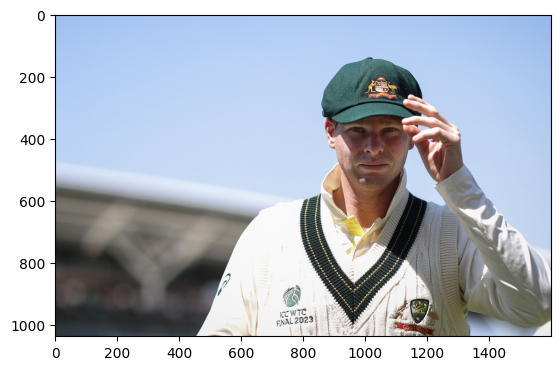

In [17]:
plt.imshow(pixels)

In [18]:
plt.show()


In [4]:
import os
import sys
from matplotlib import pyplot

base_dir = os.path.join('./')
count = 0

for file in os.listdir(base_dir + '/images/'):
    file_name, file_ext = os.path.splitext(file)
    if (file_ext in ['.png', '.jpg', '.jpeg']):
        image = pyplot.imread(base_dir + '/images/' + file)

In [5]:
type(image)

numpy.ndarray

In [6]:
image

array([[[42, 27, 22],
        [42, 27, 22],
        [41, 26, 21],
        ...,
        [33, 24, 19],
        [35, 26, 21],
        [31, 22, 17]],

       [[43, 28, 23],
        [43, 28, 23],
        [42, 27, 22],
        ...,
        [35, 26, 21],
        [36, 27, 22],
        [32, 23, 18]],

       [[42, 29, 23],
        [42, 29, 23],
        [42, 29, 23],
        ...,
        [35, 24, 18],
        [35, 24, 18],
        [30, 19, 13]],

       ...,

       [[38, 19, 15],
        [38, 19, 15],
        [39, 20, 16],
        ...,
        [85, 57, 43],
        [85, 57, 43],
        [85, 57, 43]],

       [[36, 18, 16],
        [37, 19, 17],
        [38, 20, 18],
        ...,
        [81, 55, 42],
        [81, 55, 42],
        [80, 54, 41]],

       [[32, 17, 14],
        [33, 18, 15],
        [35, 20, 17],
        ...,
        [78, 52, 39],
        [78, 52, 39],
        [77, 51, 38]]], dtype=uint8)

In [13]:
import os

image_folder = "images"
image_files = []

for filename in os.listdir(image_folder):
    if filename.endswith((".png", ".jpg", ".jpeg", ".gif")):
        image_files.append(filename)

print(image_files)


['pat-cummins.jpg', 'steve-smith-mcg.jpg', 'steve-smith-sixers.jpg', 'aravind-kumar-xqkCgI1oSlg-unsplash.jpg', 'aravind-kumar-xqkCgI1oSlg-unsplash(1).jpg', 'aravind-kumar-xqkCgI1oSlg-unsplash(2).jpg', 'aravind-kumar-xqkCgI1oSlg-unsplash(3).jpg', 'austin-wade-X6Uj51n5CE8-unsplash.jpg', 'austin-wade-X6Uj51n5CE8-unsplash(1).jpg', 'austin-wade-X6Uj51n5CE8-unsplash(2).jpg', 'austin-wade-X6Uj51n5CE8-unsplash(3).jpg', 'camilla-frederiksen-bvMOydy04Ok-unsplash.jpg', 'church-of-the-king-j9jZSqfH5YI-unsplash.jpg', 'church-of-the-king-j9jZSqfH5YI-unsplash(1).jpg', 'church-of-the-king-j9jZSqfH5YI-unsplash(2).jpg', 'church-of-the-king-j9jZSqfH5YI-unsplash(3).jpg', 'dinesh-kag-Wkb2Q5_fKZI-unsplash.jpg', 'dinesh-kag-Wkb2Q5_fKZI-unsplash(1).jpg', 'dinesh-kag-Wkb2Q5_fKZI-unsplash(2).jpg', 'himanshu-singh-gurjar-iSi02D_Qx_w-unsplash.jpg', 'himanshu-singh-gurjar-iSi02D_Qx_w-unsplash(1).jpg', 'himanshu-singh-gurjar-iSi02D_Qx_w-unsplash(2).jpg', 'lucas-gouvea-aoEwuEH7YAs-unsplash.jpg', 'lucas-gouvea-aoEwuE

In [10]:
from matplotlib import pyplot
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
    # load image from file
    pixels = pyplot.imread(filename)
    # create 8the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    # extract the bounding box from the first face
    x1, y1, width, height = results[0]['box']
    x2, y2 = x1 + width, y1 + height
    # extract the face
    face = pixels[y1:y2, x1:x2]
    # resize pixels to the model size
    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = asarray(image)
    return face_array

In [17]:
# load the photo and extract the face
for i in range(len(image_files)):
    pixels = extract_face(image_files[i])
# # plot the extracted face
# pyplot.imshow(pixels)
# # show the plot
# pyplot.show()

1/1 [==============================] - 0s 84ms/step


FileNotFoundError: [Errno 2] No such file or directory: 'aravind-kumar-xqkCgI1oSlg-unsplash.jpg'

In [20]:
from keras_vggface.vggface import VGGFace
# create a vggface2 model
model = VGGFace(model='resnet50')
# summarize input and output shape
print('Inputs: %s' % model.inputs)
print('Outputs: %s' % model.outputs)

165439116/165439116 [==============================] - 89s 1us/step
Inputs: [<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_7')>]
Outputs: [<KerasTensor: shape=(None, 8631) dtype=float32 (created by layer 'classifier')>]


In [21]:
from scipy.spatial.distance import cosine
from mtcnn.mtcnn import MTCNN
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input

In [22]:
# extract faces and calculate face embeddings for a list of photo files
def get_embeddings(filenames):
    # extract faces
    faces = [extract_face(f) for f in filenames]
    # convert into an array of samples
    samples = asarray(faces, 'float32')
    # prepare the face for the model, e.g. center pixels
    samples = preprocess_input(samples, version=2)
    # create a vggface model
    model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
    # perform prediction
    yhat = model.predict(samples)
    return yhat

In [24]:
# determine if a candidate face is a match for a known face
def is_match(known_embedding, candidate_embedding, thresh=0.5):
    # calculate distance between embeddings
    score = cosine(known_embedding, candidate_embedding)
    if score <= thresh:
        print('>face is a Match (%.3f <= %.3f)' % (score, thresh))
    else:
        print('>face is NOT a Match (%.3f > %.3f)' % (score, thresh))

In [28]:
filenames = ['steve-smith-mcg.jpg', 'steve-smith-sixers.jpg', 'pat-cummins.jpg']

In [29]:
embeddings = get_embeddings(filenames)

1/1 [==============================] - 0s 488ms/step


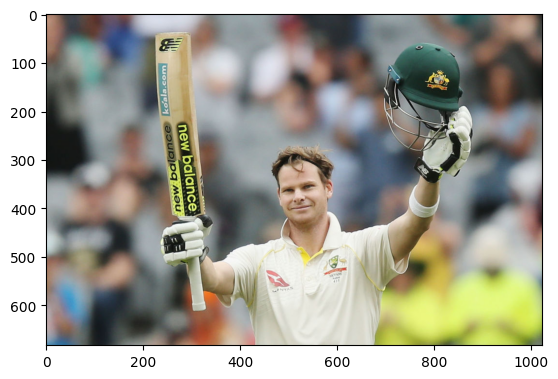

In [40]:
smith = plt.imread(filenames[0])
plt.imshow(smith)

Positive Tests
>face is a Match (0.156 <= 0.500)


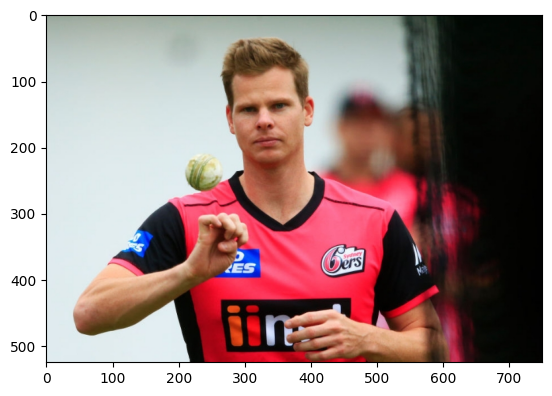

In [37]:
#define steve smith
steve_id = embeddings[0]

# verify known photos of sharon
print('Positive Tests')
is_match(embeddings[0], embeddings[1])
px = plt.imread(filenames[1])
plt.imshow(px)

Negative Tests
>face is NOT a Match (0.723 > 0.500)


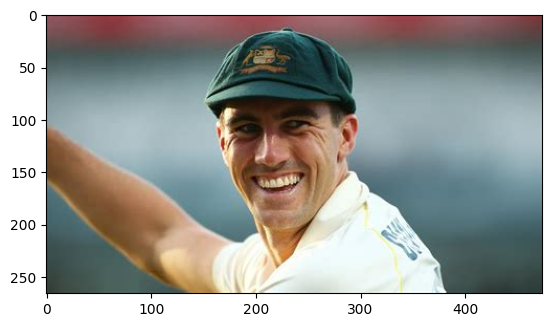

In [38]:
# verify photos of other people
print('Negative Tests')
is_match(embeddings[0], embeddings[2])
px1 = plt.imread(filenames[2])
plt.imshow(px1)

In [58]:
import numpy as np
# without extracting faces

def get_embeddings(filenames):

    # Open the image file
    faces = Image.open('steve-smith-mcg.jpg')

#     # Resize the image
#     new_size = (224, 224)  # Specify the desired width and height
#     resized_image = faces.resize(new_size)
    
    # Resize the image to the required input shape
    new_size = (224, 224)  # Specify the required width and height
    resized_image = faces.resize(new_size)

    # Convert the image to a NumPy array
    faces = np.array(resized_image)
    
    # Expand dimensions to create a batch of size 1
    faces = np.expand_dims(faces, axis=0)
    #faces = faces.flatten()
    # convert into an array of samples
    samples = asarray(faces, 'float32')
    # prepare the face for the model, e.g. center pixels
    samples = preprocess_input(samples, version=2)
    # create a vggface model
    model = VGGFace(model='resnet50', include_top=False, input_shape=(224, 224, 3), pooling='avg')
    # perform prediction
    yhat = model.predict(samples)
    return yhat

stm = get_embeddings('steve-smith-mcg.jpg')
stm2 = get_embeddings('steve-smith-sixers.jpg')

1/1 [==============================] - 0s 485ms/step


In [64]:
type(stm)
steve = stm.flatten()
steve2 = stm2.flatten()

In [67]:
print(steve.ndim)

1


In [65]:
is_match(stm, stm2)

ValueError: Input vector should be 1-D.

In [70]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(stm, stm2)

In [72]:
pc = get_embeddings('pat-cummins.jpg')

1/1 [==============================] - 0s 486ms/step


In [71]:
similarity

array([[0.9999999]], dtype=float32)

In [73]:
pat_similarity = cosine_similarity(stm, pc)

In [74]:
pat_similarity

array([[0.9999999]], dtype=float32)

In [21]:
from matplotlib import pyplot as plt
from PIL import Image
from numpy import asarray
from mtcnn.mtcnn import MTCNN
import os

# extract a single face from a given photograph
def extract_face(filename, required_size=(224, 224)):
    # load image from file
    pixels = plt.imread(filename)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    
    if results:  # If a face is detected
        # extract the bounding box from the first face
        x1, y1, width, height = results[0]['box']
        x2, y2 = x1 + width, y1 + height
        # extract the face
        face = pixels[y1:y2, x1:x2]
        # resize pixels to the model size
        image = Image.fromarray(face)
        image = image.resize(required_size)
        face_array = asarray(image)
        return face_array
    else:
        return None

# Folder containing the images
image_folder = "images_kids"
# List to store the face images
face_images = []

for filename in os.listdir(image_folder):
    if filename.endswith((".png", ".jpg", ".jpeg", ".gif")):
        file_path = os.path.join(image_folder, filename)
        face = extract_face(file_path)
        if face is not None:
            face_images.append((filename, face))
            # Save the extracted face as a new image
            face_image = Image.fromarray(face)
            face_image.save("face_" + filename)

# Print the list of face images
for name, face in face_images:
    print(name)

2/2 [==============================] - 0s 5ms/step
church-of-the-king.jpg
church-of-the-king(1).jpg
church-of-the-king(2).jpg
